In [1]:
import numpy as np
import pandas as pd

In [77]:
links = pd.read_csv('../../../data/links.csv')

movies = pd.read_csv('../../../data/movies.csv')

ratings = pd.read_csv('../../../data/ratings.csv')

tags = pd.read_csv('../../../data/tags.csv')

new = pd.merge(links, movies)

new_2 = pd.merge(new, ratings)

# Drop movieId and timestamp
tags_2 = tags.drop(columns=['movieId', 'timestamp'])

df_pre = pd.merge(new_2, tags_2)

# Drop null values
df = df_pre.dropna()

# replace | with , in the genres column
df['genres'] = df['genres'].str.replace('|',',')

merged_data = pd.merge(ratings , movies, on='movieId')

##

<ipython-input-77-bcb876a89b6d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['genres'].str.replace('|',',')


In [3]:
# explode new_genres
df = df.explode('genres')

In [4]:
df

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
0,1,114709,862.0,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy",7,4.5,1106635946,way too long
1,50,114814,629.0,"Usual Suspects, The (1995)","Crime,Mystery,Thriller",7,4.5,1106635993,way too long
2,58,110877,11010.0,"Postman, The (Postino, Il) (1994)","Comedy,Drama,Romance",7,3.0,1106635520,way too long
3,150,112384,568.0,Apollo 13 (1995),"Adventure,Drama,IMAX",7,4.5,1106635925,way too long
4,165,112864,1572.0,Die Hard: With a Vengeance (1995),"Action,Crime,Thriller",7,4.0,1106635987,way too long
...,...,...,...,...,...,...,...,...,...
4626861,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action,Animation",184,3.5,1537110021,psychology
4626862,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action,Animation",184,3.5,1537110021,anime
4626863,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action,Animation",184,3.5,1537110021,comedy
4626864,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action,Animation",184,3.5,1537110021,gintama


In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
from PIL import Image

%matplotlib inline

In [10]:
print (f"{len(movies)} movies in total.")

9742 movies in total.


In [14]:
df

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
0,1,114709,862.0,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy",7,4.5,1106635946,way too long
1,50,114814,629.0,"Usual Suspects, The (1995)","Crime,Mystery,Thriller",7,4.5,1106635993,way too long
2,58,110877,11010.0,"Postman, The (Postino, Il) (1994)","Comedy,Drama,Romance",7,3.0,1106635520,way too long
3,150,112384,568.0,Apollo 13 (1995),"Adventure,Drama,IMAX",7,4.5,1106635925,way too long
4,165,112864,1572.0,Die Hard: With a Vengeance (1995),"Action,Crime,Thriller",7,4.0,1106635987,way too long
...,...,...,...,...,...,...,...,...,...
4626861,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action,Animation",184,3.5,1537110021,psychology
4626862,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action,Animation",184,3.5,1537110021,anime
4626863,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action,Animation",184,3.5,1537110021,comedy
4626864,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action,Animation",184,3.5,1537110021,gintama


In [17]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [18]:

from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise import NMF
from surprise import CoClustering
from surprise import SlopeOne
from surprise.model_selection import cross_validate


algo1 = SVD()
algo2 = KNNBasic()
algo3 = NMF()
algo4 = CoClustering()
algo5 = SlopeOne()

# Run 5-fold cross-validation and print results
algo1_dict = cross_validate(algo1, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo2_dict = cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo3_dict = cross_validate(algo3, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo4_dict = cross_validate(algo4, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo5_dict = cross_validate(algo5, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


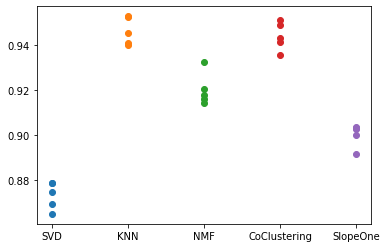

In [19]:
import matplotlib.pyplot as plt

algos = ['SVD', 'KNN', 'NMF', 'CoClustering', 'SlopeOne']
x_pos = np.arange(float(len(algos)))

Y = [algo1_dict['test_rmse'], algo2_dict['test_rmse'], algo3_dict['test_rmse'], algo4_dict['test_rmse'], algo5_dict['test_rmse']]
for y in range(len(Y)):
  plt.scatter([algos[y], algos[y], algos[y], algos[y], algos[y]], Y[y], marker='o')

In [20]:
from collections import defaultdict

def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [21]:
trainset = data.build_full_trainset()
algo1.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo1.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

1 [318, 48516, 720, 914, 898, 899, 904, 908, 912, 930]
2 [1104, 296, 7361, 356, 1276, 1266, 4973, 2329, 4878, 3949]
3 [77455, 142488, 48516, 68157, 4642, 333, 916, 40819, 1266, 3435]
4 [1148, 1212, 3435, 1247, 48516, 1193, 922, 1204, 8950, 33166]
5 [1242, 1136, 1104, 2019, 1258, 1196, 78499, 924, 106642, 5618]
6 [4306, 908, 910, 5690, 922, 1719, 56782, 48780, 899, 1276]
7 [1235, 1197, 1204, 904, 914, 296, 1223, 1247, 2571, 1214]
8 [750, 858, 260, 1221, 4973, 904, 1136, 3435, 1201, 1197]
9 [1213, 1228, 1276, 1252, 1208, 898, 608, 904, 5618, 99114]
10 [1276, 904, 1704, 1172, 1213, 1584, 6016, 1204, 1250, 1927]
11 [1213, 3429, 3451, 48516, 2329, 1245, 1089, 4226, 56782, 475]
12 [47, 50, 110, 260, 296, 356, 527, 593, 1089, 1197]
13 [1204, 318, 527, 750, 1104, 858, 296, 7153, 1250, 1136]
14 [3681, 541, 1198, 1104, 914, 2324, 858, 778, 1089, 2019]
15 [1104, 908, 1197, 750, 1204, 142488, 8368, 1235, 1089, 922]
16 [1204, 56782, 55118, 6016, 1209, 5690, 246, 142488, 112552, 1237]
17 [38061, 898

571 [750, 1262, 2959, 2580, 1204, 318, 109487, 50, 1276, 720]
572 [1617, 2160, 922, 3996, 720, 1223, 1219, 1283, 589, 76093]
573 [1262, 76093, 778, 1235, 1172, 3275, 106642, 6350, 904, 5690]
574 [1204, 1198, 7361, 750, 904, 8132, 908, 4226, 168252, 1219]
575 [750, 58559, 1204, 56782, 1201, 898, 1617, 1148, 1262, 1136]
576 [318, 1204, 4973, 1201, 527, 750, 741, 1272, 1225, 1148]
577 [750, 898, 48516, 50, 6016, 1089, 4973, 2360, 1217, 1276]
578 [1213, 1276, 2160, 112552, 3681, 2959, 4995, 1204, 2324, 1201]
579 [1204, 750, 56782, 296, 1213, 5618, 5952, 58559, 2329, 54997]
580 [1261, 1245, 1237, 2580, 1252, 8958, 54997, 3671, 1223, 55820]
581 [50, 858, 898, 1213, 2028, 1104, 1234, 1089, 246, 1945]
582 [318, 296, 50, 1197, 1204, 1210, 3275, 527, 3451, 1242]
583 [750, 1204, 318, 1276, 2959, 1196, 4973, 904, 5500, 1219]
584 [318, 4306, 56782, 3451, 1041, 69844, 142488, 527, 1148, 1217]
585 [318, 1104, 112552, 1258, 1248, 953, 3468, 56782, 44195, 1172]
586 [48516, 912, 1207, 1276, 4973, 38061,

In [24]:
algo = SVD()
trainset = data.build_full_trainset()
algo.fit(trainset)
# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

In [25]:
predictions

[Prediction(uid=1, iid=318, r_ui=3.501556983616962, est=5, details={'was_impossible': False}),
 Prediction(uid=1, iid=1704, r_ui=3.501556983616962, est=4.920922036761811, details={'was_impossible': False}),
 Prediction(uid=1, iid=6874, r_ui=3.501556983616962, est=4.683804302382346, details={'was_impossible': False}),
 Prediction(uid=1, iid=8798, r_ui=3.501556983616962, est=4.537927389362881, details={'was_impossible': False}),
 Prediction(uid=1, iid=46970, r_ui=3.501556983616962, est=4.180020539052144, details={'was_impossible': False}),
 Prediction(uid=1, iid=48516, r_ui=3.501556983616962, est=4.939008964113966, details={'was_impossible': False}),
 Prediction(uid=1, iid=58559, r_ui=3.501556983616962, est=5, details={'was_impossible': False}),
 Prediction(uid=1, iid=60756, r_ui=3.501556983616962, est=4.652585149700755, details={'was_impossible': False}),
 Prediction(uid=1, iid=68157, r_ui=3.501556983616962, est=4.958078018697938, details={'was_impossible': False}),
 Prediction(uid=1, i

In [26]:
testset

[(1, 318, 3.501556983616962),
 (1, 1704, 3.501556983616962),
 (1, 6874, 3.501556983616962),
 (1, 8798, 3.501556983616962),
 (1, 46970, 3.501556983616962),
 (1, 48516, 3.501556983616962),
 (1, 58559, 3.501556983616962),
 (1, 60756, 3.501556983616962),
 (1, 68157, 3.501556983616962),
 (1, 71535, 3.501556983616962),
 (1, 74458, 3.501556983616962),
 (1, 77455, 3.501556983616962),
 (1, 79132, 3.501556983616962),
 (1, 80489, 3.501556983616962),
 (1, 80906, 3.501556983616962),
 (1, 86345, 3.501556983616962),
 (1, 89774, 3.501556983616962),
 (1, 91529, 3.501556983616962),
 (1, 91658, 3.501556983616962),
 (1, 99114, 3.501556983616962),
 (1, 106782, 3.501556983616962),
 (1, 109487, 3.501556983616962),
 (1, 112552, 3.501556983616962),
 (1, 114060, 3.501556983616962),
 (1, 115713, 3.501556983616962),
 (1, 122882, 3.501556983616962),
 (1, 131724, 3.501556983616962),
 (1, 31, 3.501556983616962),
 (1, 647, 3.501556983616962),
 (1, 688, 3.501556983616962),
 (1, 720, 3.501556983616962),
 (1, 849, 3.501

In [28]:
from surprise import BaselineOnly
cross_validate(BaselineOnly(), data, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8733  0.8831  0.8712  0.8690  0.8662  0.8725  0.0058  
MAE (testset)     0.6735  0.6797  0.6701  0.6703  0.6697  0.6727  0.0038  
Fit time          0.49    0.36    0.39    0.41    0.52    0.43    0.06    
Test time         0.22    0.20    0.24    0.25    0.27    0.23    0.02    


{'test_rmse': array([0.87327925, 0.88307191, 0.87121028, 0.8689509 , 0.86617429]),
 'test_mae': array([0.67345103, 0.67972864, 0.6701396 , 0.67034931, 0.66967056]),
 'fit_time': (0.4897935390472412,
  0.3562290668487549,
  0.38635921478271484,
  0.40876102447509766,
  0.5166418552398682),
 'test_time': (0.2224724292755127,
  0.1951894760131836,
  0.2398233413696289,
  0.2491285800933838,
  0.26537370681762695)}

In [29]:
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV

In [30]:
sim_options = {
    "name": ["msd", "cosine"],
    "min_support": [2, 3, 4, 5],
    "user_based": [False, True],
}

param_grid = {"sim_options": sim_options}

gs_1 = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs_1.fit(data)

print(gs_1.best_score["rmse"])
print(gs_1.best_params["rmse"])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [37]:
data

In [31]:
# param_grid = {
        #"n_epochs": [5, 10, 15, 20, 30, 40, 50, 100],
        # "lr_all": [0.001, 0.002, 0.005],
       # "reg_all": [0.02, 0.08, 0.4, 0.6]
#}

# smaller grid for testing
param_grid = {
    "n_epochs": [15, 20, 25],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.02]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], refit=True, cv=5)

gs.fit(data)

training_parameters = gs.best_params["rmse"]

print("BEST RMSE: \t", gs.best_score["rmse"])
print("BEST MAE: \t", gs.best_score["mae"])
print("BEST params: \t", gs.best_params["rmse"])

BEST RMSE: 	 0.8729933652329365
BEST MAE: 	 0.6703950247981366
BEST params: 	 {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}


In [32]:
def get_movie_id(movie_title):
    
    # Filter Movies dataframe for movie_title
    movie_title_df = movies[['title', 'movieId']]
    # Get corresponding id from row
    #movie_id = movie_title_df.query('title==movie_title')['movieId']
    movie_id = movie_title_df.loc['movieId']
    # Return movie_id of movie_title
    return movie_id

In [35]:
import pickle
# Save the trained model as a pickle string.
saved_model = pickle.dumps(gs)
# Load the pickled model
gs_from_pickle = pickle.loads(saved_model)
# Use the loaded pickled model to make predictions
#gs_from_pickle.predict(trainset)AQS

In [38]:
Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

##

In [47]:
ratings[['userId', 'movieId', 'rating']]

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [46]:
one_row = {'userId':[1],
          'movieId':[1],
          'rating':[4]}
example_selection = pd.DataFrame.from_dict(one_row,)

In [64]:
example_selection

,userId,movieId,rating
0,1,1,4


In [70]:
example_surpise = Dataset.load_from_df(example_selection, reader)
gs.test(example_surpise)

TypeError: 'DatasetAutoFolds' object is not iterable

In [66]:
algo_check = gs.best_estimator['rmse']
algo_check.fit(data.build_full_trainset())

In [67]:
algo_check.test(example_surpise)

TypeError: 'DatasetAutoFolds' object is not iterable

In [71]:
data

In [53]:
example_surpise

In [90]:
rating_data = pd.DataFrame(merged_data.groupby('title')['rating','movieId','userId'].mean())

##

<ipython-input-90-1d1185663607>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rating_data = pd.DataFrame(merged_data.groupby('title')['rating','movieId','userId'].mean())


In [99]:
rating_data['# of ratings'] = merged_data.groupby('title')['rating'].count()

##

In [100]:
rating_data

,rating,movieId,userId,# of ratingss,# of ratings
title,,,,,
'71 (2014),4.000000,117867.0,610.000000,1,1
'Hellboy': The Seeds of Creation (2004),4.000000,97757.0,332.000000,1,1
'Round Midnight (1986),3.500000,26564.0,354.500000,2,2
'Salem's Lot (2004),5.000000,27751.0,345.000000,1,1
'Til There Was You (1997),4.000000,779.0,229.000000,2,2
...,...,...,...,...,...
eXistenZ (1999),3.863636,2600.0,389.954545,22,22
xXx (2002),2.770833,5507.0,272.916667,24,24
xXx: State of the Union (2005),2.000000,33158.0,386.000000,5,5


In [119]:
ratings_matrix = merged_data.pivot_table(index='userId',columns='title',values='rating')
ratings_matrix.to_csv('./ratings_matrix.csv', index = False)

##

In [125]:
ratings_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [93]:
df

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
0,1,114709,862.0,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy",7,4.5,1106635946,way too long
1,50,114814,629.0,"Usual Suspects, The (1995)","Crime,Mystery,Thriller",7,4.5,1106635993,way too long
2,58,110877,11010.0,"Postman, The (Postino, Il) (1994)","Comedy,Drama,Romance",7,3.0,1106635520,way too long
3,150,112384,568.0,Apollo 13 (1995),"Adventure,Drama,IMAX",7,4.5,1106635925,way too long
4,165,112864,1572.0,Die Hard: With a Vengeance (1995),"Action,Crime,Thriller",7,4.0,1106635987,way too long
...,...,...,...,...,...,...,...,...,...
4626861,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action,Animation",184,3.5,1537110021,psychology
4626862,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action,Animation",184,3.5,1537110021,anime
4626863,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action,Animation",184,3.5,1537110021,comedy
4626864,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action,Animation",184,3.5,1537110021,gintama


In [129]:
def movie_recommendations(movie_name):
    user_ratings = ratings_matrix[movie_name]
    correlation_with_movie = pd.DataFrame(ratings_matrix.corrwith(user_ratings))
    correlation_with_movie = correlation_with_movie.join(rating_data['# of ratings'])
    correlation_with_movie.columns = [f'Corr. With {movie_name}', '# of Ratings']
    correlation_with_movie.index.names = ['Movie Title']
    #return correlation_with_movie[correlation_with_movie['# of Ratings'] > 50].sort_values(f'Corr. With {movie_name}', ascending = False).iloc[1:,:].head(10)
    return correlation_with_movie[correlation_with_movie['# of Ratings'] > 50].sort_values(f'Corr. With {movie_name}', ascending = False).iloc[1:,:0].head(5)

##

In [130]:
movie_recommendations('Toy Story (1995)')

##

C:\Users\danie\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\danie\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


""
Movie Title
Toy Story 2 (1999)
Arachnophobia (1990)
"Incredibles, The (2004)"
Finding Nemo (2003)
Aladdin (1992)
